In [33]:
import urllib.request
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [25]:
# read the CSV file into a pandas DataFrame
df = pd.read_csv('E:\Courses\COURSERA\IBM Data Analyst Professional Certificate\IBM Data Analyst Capstone Project\W-5\CSV\m5_survey_data_technologies_normalised.csv')
df

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim,NaN,NaN,NaN,NaN
3,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN
4,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74585,25142.0,Go,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74586,25142.0,HTML/CSS,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74587,25142.0,PHP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74588,25142.0,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
import tabulate
top_languages = df['LanguageWorkedWith'].value_counts().head(10)
# Create a new DataFrame with the top languages and their counts
top_languages_df = pd.DataFrame({'Language': top_languages.index, 'Count': top_languages.values})
top_languages_df.index += 1
print(tabulate.tabulate(top_languages_df.reset_index(), headers=["Language", "Count"], tablefmt="pipe", showindex=False))

|    | Language              |   Count |
|---:|:----------------------|--------:|
|  1 | JavaScript            |    8687 |
|  2 | HTML/CSS              |    7830 |
|  3 | SQL                   |    7106 |
|  4 | Bash/Shell/PowerShell |    4642 |
|  5 | Python                |    4542 |
|  6 | Java                  |    4506 |
|  7 | C#                    |    4288 |
|  8 | TypeScript            |    3232 |
|  9 | PHP                   |    2913 |
| 10 | C++                   |    1946 |


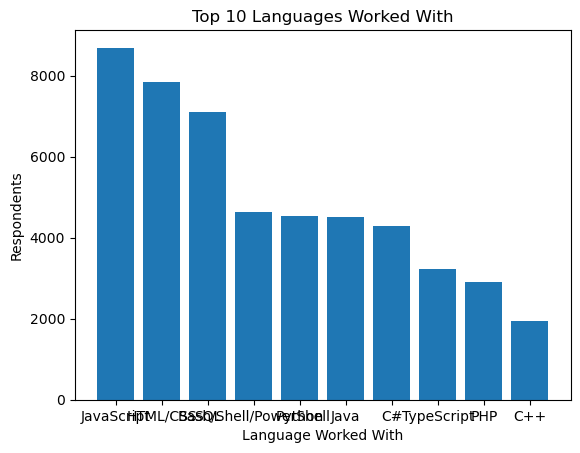

In [61]:
plt.bar(top_languages.index, top_languages.values)
plt.xlabel('Language Worked With')
plt.ylabel('Respondents')
plt.title('Top 10 Languages Worked With')
plt.show()

CSV from df filtered two column for top 10 LanguageWorkedWith and responders number

In [52]:
grouped_df = df.groupby('LanguageWorkedWith')['Respondent'].count()
sorted_df = grouped_df.sort_values(ascending=False)
top_10_df = sorted_df.head(10)
result_df = df[df['LanguageWorkedWith'].isin(top_10_df.index)]
result_df = result_df.groupby('LanguageWorkedWith')['Respondent'].count().reset_index(name='NumRespondents')
import tempfile
tempdir = tempfile.gettempdir()
result_df.to_csv(tempdir + '/top_10_languages.csv', index=False)
from IPython.display import FileLink
FileLink(tempdir + '/top_10_languages.csv')

C:\Users\Boris\AppData\Local\Temp\top_10_languages.csv